# 相关系数
By Evgenia "Jenny" Nitishinskaya and Delaney Granizo-Mackenzie with example algorithms by David Edwards

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)


---

相关系数衡量的是两个变量之间线性关系的程度。它的值总是在-1和1之间。正系数表示变量之间是直接相关的，即当一个变量增加时，另一个变量也增加。负系数表示变量之间是负相关的，因此当一个变量增加时，另一个变量就会减少。相关系数越接近0，变量之间的关系越弱。

定义两个系列$X$和$Y$的相关系数为
$$r = \frac{Cov(X,Y)}{std(X)std(Y)}$$
其中$Cov$是协方差，$std$是标准差。

两组随机数据的相关系数接近于0

## 相关性和协方差

相关性只是协方差的一种标准化形式。它们在其他方面是相同的，在日常会话中经常半互换使用。显然，在讨论这两者时，精确地使用语言是很重要的，但在概念上它们几乎是相同的。

协方差本身并没有什么意义

假设有两个变量$X$和$Y$然后求它们的协方差。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = np.random.rand(50)
Y = 2 * X + np.random.normal(0, 0.1, 50)

np.cov(X, Y)[0, 1]

0.13042868000628854

那现在怎么办?这是什么意思?相关性使用关于X和Y的方差的信息来标准化这个度量。一旦我们将度规规范化为-1到1的比例，我们就可以做出有意义的声明并比较相关性。

要了解这是如何做到的，请考虑这个公式。

$$\frac{Cov(X, Y)}{std(X)std(Y)}$$

$$= \frac{Cov(X, Y)}{\sqrt{var(X)}\sqrt{var(Y)}}$$

$$= \frac{Cov(X, Y)}{\sqrt{Cov(X, X)}\sqrt{Cov(Y, Y)}}$$

为了说明这一点，我们来比较两个系列的相关性和协方差。

In [10]:
X = np.random.rand(50)
Y = 2 * X + 4

print('Covariance of X and Y: \n' ,np.cov(X, Y)) 
print('Correlation of X and Y: \n' ,np.corrcoef(X, Y)) 

Covariance of X and Y: 
 [[0.06288002 0.12576004]
 [0.12576004 0.25152008]]
Correlation of X and Y: 
 [[1. 1.]
 [1. 1.]]


## 为什么`np.cov`和`np.corrcoef`都返回矩阵?

协方差矩阵是统计学中的一个重要概念。通常人们会提到两个变量$X$和$Y$的协方差，但实际上这只是$X$和$Y$的协方差矩阵中的一项。对于每个输入变量，我们有一行和一列。对角线就是这个变量的方差，或者说$Cov(X, X)$，对角线外的项是不同变量间的协方差。矩阵在对角线上是对称的。我们来验证一下。

In [8]:
cov_matrix = np.cov(X, Y)

# We need to manually set the degrees of freedom on X to 1, as numpy defaults to 0 for variance
# This is usually fine, but will result in a slight mismatch as np.cov defaults to 1
error = cov_matrix[0, 0] - X.var(ddof=1)

print( 'error: ' , error)

error:  0.0


Correlation:  -0.22726236034333977
Built-in Correlation:  -0.22271711313647305


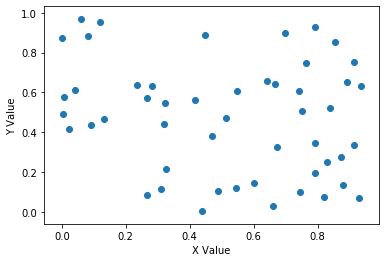

In [9]:
X = np.random.rand(50)
Y = np.random.rand(50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

# taking the relevant value from the matrix returned by np.cov
print('Correlation: ' ,np.cov(X,Y)[0,1]/(np.std(X)*np.std(Y))) 
# Let's also use the builtin correlation function
print( 'Built-in Correlation: ' ,np.corrcoef(X, Y)[0, 1])

现在让我们看看两个相关的数据集是什么样子的。

Correlation:  0.9482453090675041


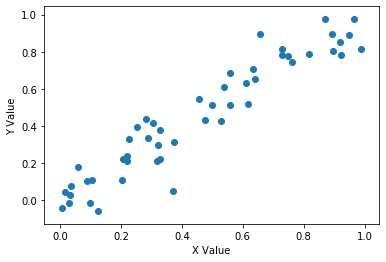

In [11]:
X = np.random.rand(50)
Y = X + np.random.normal(0, 0.1, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print ('Correlation: ' ,np.corrcoef(X, Y)[0, 1])

让我们通过引入更多的干扰来降低这种关系。

Correlation:  0.876406056746694


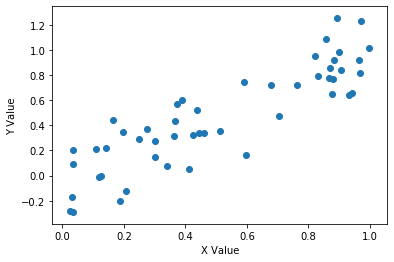

In [12]:
X = np.random.rand(50)
Y = X + np.random.normal(0, .2, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print ('Correlation: ' ,np.corrcoef(X, Y)[0, 1])

最后，让我们看看什么是逆关系。

Correlation:  -0.9560424210392025


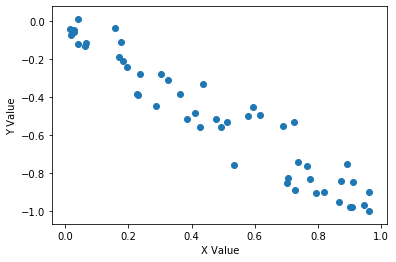

In [13]:
X = np.random.rand(50)
Y = -X + np.random.normal(0, .1, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print ('Correlation: ' ,np.corrcoef(X, Y)[0, 1])

我们看到了一些舍入误差，但它们显然是相同的值。

## 这在金融领域有什么用呢?

### 确定相关资产

一旦我们确定了两个序列可能是相关的，我们就可以使用它来预测该系列的未来值。例如，让我们看看苹果和半导体设备制造商Lam Research Corporation的价格。

Correlation coefficients
LRCX and AAPL:  0.9528507828541242
LRCX and SPY:  0.9354365341655831
AAPL and SPY:  0.8890956956985643


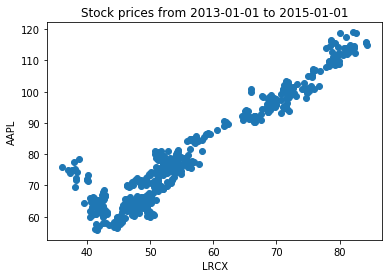

In [14]:
import pandas_datareader.data as data
# Pull the pricing data for our two stocks and S&P 500
start = '2013-01-01'
end = '2015-01-01'
bench = data.get_data_yahoo('SPY', start,end)['Close']
a1 = data.get_data_yahoo('LRCX', start,end)['Close']
a2 = data.get_data_yahoo('AAPL', start,end)['Close']

plt.scatter(a1,a2)
plt.xlabel('LRCX')
plt.ylabel('AAPL')
plt.title('Stock prices from ' + start + ' to ' + end)
print("Correlation coefficients") 
print ("LRCX and AAPL: ", np.corrcoef(a1,a2)[0,1])
print ("LRCX and SPY: ", np.corrcoef(a1,bench)[0,1])
print ("AAPL and SPY: ", np.corrcoef(bench,a2)[0,1])

### 构建不相关资产的投资组合

相关性在金融领域有用的另一个原因是，不相关的资产能够产生最佳的投资组合。对此的直觉是，如果资产不相关，一个资产的减少将不会与另一个资产的减少相对应。当许多不相关的资产被组合在一起时，这导致了一个非常稳定的回报流。

# 局限

## 意义

很难严格地确定相关性是否重要，特别是在这里，变量不是正态分布的情况下。它们的相关系数接近于1，所以我们可以很有把握地说，这两种股票价格在我们使用的时间段内是相关的，但这是否预示着未来的相关性呢?如果我们考察它们与标准普尔500指数的相关性，我们会发现它们的相关性也相当高。因此，与平均股价相比，苹果和LRCX之间的相关性略高。

一个基本的问题是，通过选择正确的时间段，很容易就能获得数据相关性。为了避免这种情况，我们应该计算两个量在许多历史时期的相关性，并检查相关系数的分布。关于为什么单点估计值很差的更多细节将在未来的笔记本中讨论。

例如，请记住，从2013-1-1年到2015-1-1年，公司与LRCX的相关性为0.95。让我们来看看这两者之间的60天滚动相关性，看看它是如何变化的。

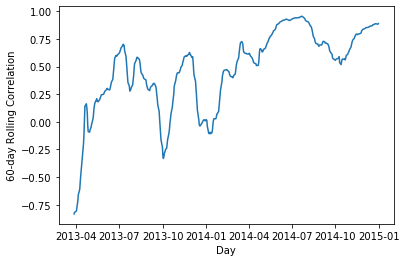

In [17]:
rolling_correlation = a1.rolling( 60).corr(a2)
plt.plot(rolling_correlation)
plt.xlabel('Day')
plt.ylabel('60-day Rolling Correlation');

## 非线性关系

相关系数可以用来检验两个变量之间关系的强度。然而，重要的是要记住，两个变量可能以不同的、可预测的方式相关联，而这种分析不会采用这种方式。例如，一个变量可能精确地遵循第二个变量的行为，但是带有延迟。有处理这种滞后相关性的技术。或者，一个变量可能与另一个变量的变化率有关。这两种关系都不是线性的，但如果检测到，它们可能非常有用。

此外，相关系数对异常值非常敏感。这意味着，包括或不包括甚至两个数据点都可能改变结果，而且并不总是清楚这些点是否包含信息或只是噪音。

举个例子，让我们把噪声分布设为泊松而不是正态分布，看看会发生什么。

0.40710211027353316

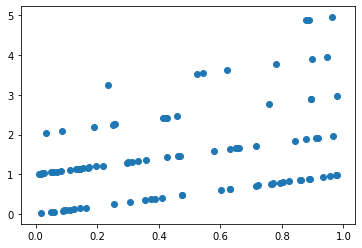

In [18]:
X = np.random.rand(100)
Y = X + np.random.poisson(size=100)

plt.scatter(X, Y)

np.corrcoef(X, Y)[0, 1]

总之，相关性是一种强大的技术，但与统计中一贯的做法一样，人们应该小心不要解释没有结果的结果。